# 2. Preprocessing, Data Visualisation et premiers constats

## 2.2 Données images :

### 2.2.1 Transformation des images en noir et blanc et en taille 28x28

Dans cette partie nous allons réduire l'ensemble des images de notre jeu de données en image de taille 28x28 puis les transformer en noir et blanc et enfin les stocker dans des DataFrames que nous concatenerons par la suite afin de former notre Dataframe final avec lequel nous allons pouvoir créer des visualisations et tester nos modèles.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('X_train_update.csv',index_col=0)
y=pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

In [2]:
#Création d'une colonne image_name:
data['image_name'] = data.astype('str').apply(lambda row: 'image_'+row['imageid']+'_product_'+row['productid']+'.jpg',axis = 1)

In [3]:
#On joint les features et target :
data=data.join(y)
#On crée un index :
data=data.reset_index()
data

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,image_1263597046_product_3804725264.jpg,10
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,image_1008141237_product_436067568.jpg,2280
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,image_938777978_product_201115110.jpg,50
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,image_457047496_product_50418756.jpg,1280
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,image_1077757786_product_278535884.jpg,2705
...,...,...,...,...,...,...,...
84911,84911,The Sims [ Import Anglais ],NaN,206719094,941495734,image_941495734_product_206719094.jpg,40
84912,84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,image_1188462883_product_3065095706.jpg,2583
84913,84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,image_1009325617_product_440707564.jpg,2280
84914,84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,image_1267353403_product_3942400296.jpg,1560


In [4]:
#Selectionner 10% du dataset en partant du debut :
df1 = data.iloc[:8493,:]
df1

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,image_1263597046_product_3804725264.jpg,10
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,image_1008141237_product_436067568.jpg,2280
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,image_938777978_product_201115110.jpg,50
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,image_457047496_product_50418756.jpg,1280
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,image_1077757786_product_278535884.jpg,2705
...,...,...,...,...,...,...,...
8488,8488,Lot 6 Partitions Saxophone (Bg Editions) - Sch...,NaN,3568594228,1222151762,image_1222151762_product_3568594228.jpg,2403
8489,8489,Moakoada®Étanche Résistant Aux Intempéries Mal...,Étanche résistant aux intempéries Mallette de ...,3893191813,1260264697,image_1260264697_product_3893191813.jpg,1300
8490,8490,Élément Gourmet Canapé Court Taie Peluche Cous...,Gourmet Élément court peluche Taie Canapé &#43...,4012755279,1276370492,image_1276370492_product_4012755279.jpg,1920
8491,8491,Dragon Bouclier A Un Oeil Mdm-F127,NaN,154153382,910075870,image_910075870_product_154153382.jpg,1160


In [5]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(len(df1)):
    img.append(path + str(df1.loc[i,'image_name']))  

In [6]:
img

['images\\images\\image_train\\image_1263597046_product_3804725264.jpg',
 'images\\images\\image_train\\image_1008141237_product_436067568.jpg',
 'images\\images\\image_train\\image_938777978_product_201115110.jpg',
 'images\\images\\image_train\\image_457047496_product_50418756.jpg',
 'images\\images\\image_train\\image_1077757786_product_278535884.jpg',
 'images\\images\\image_train\\image_393356830_product_5862738.jpg',
 'images\\images\\image_train\\image_907794536_product_91920807.jpg',
 'images\\images\\image_train\\image_999581347_product_344240059.jpg',
 'images\\images\\image_train\\image_1325918866_product_4239126071.jpg',
 'images\\images\\image_train\\image_1245644185_product_3793572222.jpg',
 'images\\images\\image_train\\image_1111840281_product_1915836983.jpg',
 'images\\images\\image_train\\image_1295816984_product_4127967621.jpg',
 'images\\images\\image_train\\image_1204199842_product_3287127001.jpg',
 'images\\images\\image_train\\image_1109088140_product_1882164320.

In [7]:
#On lit l'ensemble des imagesde df1 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))
                 

In [14]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [15]:
image_small[1].shape

(28, 28)

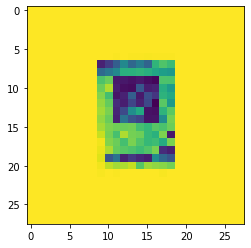

In [16]:
plt.imshow(image_small[1])

In [17]:
#On copie l'ensemble des images de df1 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df1.loc[i,'image_name']),image_small[i])

In [18]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [19]:
#On les met dans un Dataframe :
Df1_pixel = pd.DataFrame(image_ligne)

In [20]:
Df1_pixel

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,255,255,255,255,246,246,243,238,232,230,...,247,246,244,246,244,241,255,255,255,255
8489,255,255,255,255,255,255,255,255,255,255,...,7,20,20,19,20,21,21,24,25,23
8490,254,253,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8491,255,255,255,254,254,254,254,254,254,255,...,255,255,254,255,254,254,254,255,255,255


In [21]:
#On exporte le Df, dans un fichier .csv :
Df1_pixel.to_csv(r'Df1_pixel.csv', index = False)

In [22]:
data_test=pd.read_csv('Df1_pixel.csv')

In [23]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,255,255,255,255,246,246,243,238,232,230,...,247,246,244,246,244,241,255,255,255,255
8489,255,255,255,255,255,255,255,255,255,255,...,7,20,20,19,20,21,21,24,25,23
8490,254,253,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8491,255,255,255,254,254,254,254,254,254,255,...,255,255,254,255,254,254,254,255,255,255


In [25]:
#Selectionner envrion les 10% suivant du dataset :
df2 = data.iloc[8493:17435,:]
df2

,index,designation,description,productid,imageid,image_name,prdtypecode
8493,8493,Jjrc H68 Grand Angle 720p Caméra Hd Quadcopter...,JJRC H68 Grand Angle 720P Caméra HD Quadcopter...,4013275581,1276442462,image_1276442462_product_4013275581.jpg,1300
8494,8494,Pompe de filtration Poolmax TP-35,La pompe Poolmax TP35 de la marque Ubbink est ...,303052204,995296979,image_995296979_product_303052204.jpg,2583
8495,8495,Location Immobilière : Obligations Du Bailleur,NaN,1991850799,1119058328,image_1119058328_product_1991850799.jpg,2705
8496,8496,Cas Heureux Valentine Oreiller En Coton Lin Co...,Happy Valentine oreiller Cases coton lin Canap...,4003958033,1275303302,image_1275303302_product_4003958033.jpg,1920
8497,8497,Lego City 4x4 Fire Truck 4208,LEGO City 4X4 Fire Truck 4208,3776679679,1243842146,image_1243842146_product_3776679679.jpg,1280
...,...,...,...,...,...,...,...
17430,17430,Carnet De Notes Bloc-Notes Cahier La Table Du ...,Taille: En format A5 (144 cm x 21 cm) Caracter...,4164658613,1305042693,image_1305042693_product_4164658613.jpg,2522
17431,17431,Super Soft Independence Day Linen Taie Sofa Se...,Super Lin doux Independence Day Taie Sofa Set ...,4004087731,1275144694,image_1275144694_product_4004087731.jpg,1920
17432,17432,Carnet De Notes Bloc-Notes Cahierhakone Japane...,Taille: En format A5 (144 cm x 21 cm) Caractér...,4160884413,1304035286,image_1304035286_product_4160884413.jpg,2522
17433,17433,Bien Plus Que Tout,NaN,3209560974,1197762715,image_1197762715_product_3209560974.jpg,2705


In [38]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(8493,17435):
    img.append(path + str(df2.loc[i,'image_name']))  

In [56]:
img[8941]

'images\\images\\image_train\\image_1059018797_product_1087812871.jpg'

In [57]:
#On lit l'ensemble des images de df2 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))
                 

In [58]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [59]:
image_small[1].shape

(28, 28)

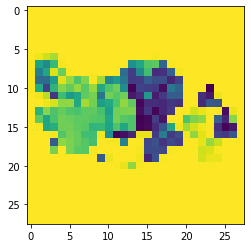

In [60]:
plt.imshow(image_small[1])

In [62]:
df2

,index,designation,description,productid,imageid,image_name,prdtypecode
8493,8493,Jjrc H68 Grand Angle 720p Caméra Hd Quadcopter...,JJRC H68 Grand Angle 720P Caméra HD Quadcopter...,4013275581,1276442462,image_1276442462_product_4013275581.jpg,1300
8494,8494,Pompe de filtration Poolmax TP-35,La pompe Poolmax TP35 de la marque Ubbink est ...,303052204,995296979,image_995296979_product_303052204.jpg,2583
8495,8495,Location Immobilière : Obligations Du Bailleur,NaN,1991850799,1119058328,image_1119058328_product_1991850799.jpg,2705
8496,8496,Cas Heureux Valentine Oreiller En Coton Lin Co...,Happy Valentine oreiller Cases coton lin Canap...,4003958033,1275303302,image_1275303302_product_4003958033.jpg,1920
8497,8497,Lego City 4x4 Fire Truck 4208,LEGO City 4X4 Fire Truck 4208,3776679679,1243842146,image_1243842146_product_3776679679.jpg,1280
...,...,...,...,...,...,...,...
17430,17430,Carnet De Notes Bloc-Notes Cahier La Table Du ...,Taille: En format A5 (144 cm x 21 cm) Caracter...,4164658613,1305042693,image_1305042693_product_4164658613.jpg,2522
17431,17431,Super Soft Independence Day Linen Taie Sofa Se...,Super Lin doux Independence Day Taie Sofa Set ...,4004087731,1275144694,image_1275144694_product_4004087731.jpg,1920
17432,17432,Carnet De Notes Bloc-Notes Cahierhakone Japane...,Taille: En format A5 (144 cm x 21 cm) Caractér...,4160884413,1304035286,image_1304035286_product_4160884413.jpg,2522
17433,17433,Bien Plus Que Tout,NaN,3209560974,1197762715,image_1197762715_product_3209560974.jpg,2705


In [73]:
#On réinitialise l'index :
df2= df2.drop('index', axis=1)
df2 = df2.reset_index()
df2

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Jjrc H68 Grand Angle 720p Caméra Hd Quadcopter...,JJRC H68 Grand Angle 720P Caméra HD Quadcopter...,4013275581,1276442462,image_1276442462_product_4013275581.jpg,1300
1,1,Pompe de filtration Poolmax TP-35,La pompe Poolmax TP35 de la marque Ubbink est ...,303052204,995296979,image_995296979_product_303052204.jpg,2583
2,2,Location Immobilière : Obligations Du Bailleur,NaN,1991850799,1119058328,image_1119058328_product_1991850799.jpg,2705
3,3,Cas Heureux Valentine Oreiller En Coton Lin Co...,Happy Valentine oreiller Cases coton lin Canap...,4003958033,1275303302,image_1275303302_product_4003958033.jpg,1920
4,4,Lego City 4x4 Fire Truck 4208,LEGO City 4X4 Fire Truck 4208,3776679679,1243842146,image_1243842146_product_3776679679.jpg,1280
...,...,...,...,...,...,...,...
8937,8937,Carnet De Notes Bloc-Notes Cahier La Table Du ...,Taille: En format A5 (144 cm x 21 cm) Caracter...,4164658613,1305042693,image_1305042693_product_4164658613.jpg,2522
8938,8938,Super Soft Independence Day Linen Taie Sofa Se...,Super Lin doux Independence Day Taie Sofa Set ...,4004087731,1275144694,image_1275144694_product_4004087731.jpg,1920
8939,8939,Carnet De Notes Bloc-Notes Cahierhakone Japane...,Taille: En format A5 (144 cm x 21 cm) Caractér...,4160884413,1304035286,image_1304035286_product_4160884413.jpg,2522
8940,8940,Bien Plus Que Tout,NaN,3209560974,1197762715,image_1197762715_product_3209560974.jpg,2705


In [74]:
#On copie l'ensemble des images de df2 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df2.loc[i,'image_name']),image_small[i])

In [75]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [76]:
#On les met dans un Dataframe :
Df2_pixel = pd.DataFrame(image_ligne)

In [77]:
Df2_pixel

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8937,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8938,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8939,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8940,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [78]:
#On exporte le Df, dans un fichier .csv :
Df2_pixel.to_csv(r'Df2_pixel.csv', index = False)

In [79]:
#Selectionner envrion les 10% suivant du dataset :
df3 = data.iloc[17435:26000,:]
df3

,index,designation,description,productid,imageid,image_name,prdtypecode
17435,17435,Kit piscine tubulaire Intex Ultra XTR Frame ro...,Piscine tubulaire ronde Intex Ultra XTR Frame ...,3804647573,1247131441,image_1247131441_product_3804647573.jpg,2583
17436,17436,Introduction To Cancer Metastasis,NaN,1719635663,1100362363,image_1100362363_product_1719635663.jpg,10
17437,17437,Maquette D'avion Remote Control Rc Cars 1/24 2...,abonnementBG1510Dvoiture de contrôle à distanc...,4160809332,1304029883,image_1304029883_product_4160809332.jpg,1300
17438,17438,Lot Be512 - 18 Marque-Pages (Belles Femmes Vin...,NaN,2927994016,1173479358,image_1173479358_product_2927994016.jpg,2403
17439,17439,Carte Trading Card Les Crados Garbage Pail Kid...,NaN,1786222119,1101970802,image_1101970802_product_1786222119.jpg,1160
...,...,...,...,...,...,...,...
25995,25995,Pack Filtre épurateur de piscine INTEX 2m³/h +...,Ce pack contient : - Filtre épurateur de pisci...,4125633462,1295220418,image_1295220418_product_4125633462.jpg,2583
25996,25996,Horizon Zero Dawn - Playstation 4,NaN,1961738407,1116524750,image_1116524750_product_1961738407.jpg,40
25997,25997,Les Dents De La Mer Jaws Unleashed Ps2 Playsta...,NaN,3785435794,1244635763,image_1244635763_product_3785435794.jpg,2462
25998,25998,Cdaffaires Store Enrouleur Tamisant Imp. 90 X ...,store enrouleur tamisant imp. 90 x 180 cm poly...,3472828977,1215772889,image_1215772889_product_3472828977.jpg,1920


In [84]:
#On réinitialise l'index : 
#df3= df3.drop('index', axis=1)
df3 = df3.reset_index()
df3

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Kit piscine tubulaire Intex Ultra XTR Frame ro...,Piscine tubulaire ronde Intex Ultra XTR Frame ...,3804647573,1247131441,image_1247131441_product_3804647573.jpg,2583
1,1,Introduction To Cancer Metastasis,NaN,1719635663,1100362363,image_1100362363_product_1719635663.jpg,10
2,2,Maquette D'avion Remote Control Rc Cars 1/24 2...,abonnementBG1510Dvoiture de contrôle à distanc...,4160809332,1304029883,image_1304029883_product_4160809332.jpg,1300
3,3,Lot Be512 - 18 Marque-Pages (Belles Femmes Vin...,NaN,2927994016,1173479358,image_1173479358_product_2927994016.jpg,2403
4,4,Carte Trading Card Les Crados Garbage Pail Kid...,NaN,1786222119,1101970802,image_1101970802_product_1786222119.jpg,1160
...,...,...,...,...,...,...,...
8560,8560,Pack Filtre épurateur de piscine INTEX 2m³/h +...,Ce pack contient : - Filtre épurateur de pisci...,4125633462,1295220418,image_1295220418_product_4125633462.jpg,2583
8561,8561,Horizon Zero Dawn - Playstation 4,NaN,1961738407,1116524750,image_1116524750_product_1961738407.jpg,40
8562,8562,Les Dents De La Mer Jaws Unleashed Ps2 Playsta...,NaN,3785435794,1244635763,image_1244635763_product_3785435794.jpg,2462
8563,8563,Cdaffaires Store Enrouleur Tamisant Imp. 90 X ...,store enrouleur tamisant imp. 90 x 180 cm poly...,3472828977,1215772889,image_1215772889_product_3472828977.jpg,1920


In [85]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(len(df3)):
    img.append(path + str(df3.loc[i,'image_name']))  

In [86]:
img

['images\\images\\image_train\\image_1247131441_product_3804647573.jpg',
 'images\\images\\image_train\\image_1100362363_product_1719635663.jpg',
 'images\\images\\image_train\\image_1304029883_product_4160809332.jpg',
 'images\\images\\image_train\\image_1173479358_product_2927994016.jpg',
 'images\\images\\image_train\\image_1101970802_product_1786222119.jpg',
 'images\\images\\image_train\\image_1134230000_product_2168084482.jpg',
 'images\\images\\image_train\\image_854232307_product_85500859.jpg',
 'images\\images\\image_train\\image_1176062172_product_2953230677.jpg',
 'images\\images\\image_train\\image_1305082320_product_4164662794.jpg',
 'images\\images\\image_train\\image_962507914_product_223928277.jpg',
 'images\\images\\image_train\\image_1258380094_product_3883432086.jpg',
 'images\\images\\image_train\\image_1096609206_product_1657064487.jpg',
 'images\\images\\image_train\\image_922143861_product_170273074.jpg',
 'images\\images\\image_train\\image_1302507168_product_41

In [87]:
#On lit l'ensemble des images de df3 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))
                 

In [88]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [89]:
#On copie l'ensemble des images de df3 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df3.loc[i,'image_name']),image_small[i])

In [90]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [91]:
#On les met dans un Dataframe :
Df3_pixel = pd.DataFrame(image_ligne)

In [92]:
#On exporte le Df, dans un fichier .csv :
Df3_pixel.to_csv(r'Df3_pixel.csv', index = False)

In [93]:
#Selectionner envrion les 10% suivant du dataset :
df4 = data.iloc[26000:35000,:]
df4

,index,designation,description,productid,imageid,image_name,prdtypecode
26000,26000,Batman Arkham City Série 4 Figurine Talia 17 Cm,Figurine articulée taille env. 17 cm avec acce...,201473494,939028925,image_939028925_product_201473494.jpg,1140
26001,26001,Brumenuit ( Nighthaze ) - Magic Mtg - Eldrazi ...,NaN,100344907,861711229,image_861711229_product_100344907.jpg,1160
26002,26002,Figurine Starlux Zineddine Zidane(En Plomb),NaN,3923999139,1264357050,image_1264357050_product_3923999139.jpg,1140
26003,26003,Lui1997®Kit Électronique Intelligente Box Pill...,Kit électronique intelligente Box Pill portabl...,4113743138,1292924098,image_1292924098_product_4113743138.jpg,1560
26004,26004,Rideau Portière Moustiques Mosquito Gris 100x220,NaN,2140485510,1128296164,image_1128296164_product_2140485510.jpg,1920
...,...,...,...,...,...,...,...
34995,34995,Ultimate Guard Boîte Pour Cartes Flip Deck Cas...,Boîte pour cartes à collectionner haute qualit...,1385300256,1077860257,image_1077860257_product_1385300256.jpg,2522
34996,34996,Pentel C505-2b Lot De 12 Etuis De 12 Mines Pou...,NaN,290707793,1046746871,image_1046746871_product_290707793.jpg,2522
34997,34997,Transformers Sonic Bomber Gc-22 (Japan Import),NaN,464646791,1013197687,image_1013197687_product_464646791.jpg,1140
34998,34998,Offrande Supreme En Ddp-F046,NaN,152783501,908751938,image_908751938_product_152783501.jpg,1160


In [102]:
#On réinitialise l'index : 
#df4= df4.drop('index', axis=1)
df4 = df4.reset_index()
df4

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Batman Arkham City Série 4 Figurine Talia 17 Cm,Figurine articulée taille env. 17 cm avec acce...,201473494,939028925,image_939028925_product_201473494.jpg,1140
1,1,Brumenuit ( Nighthaze ) - Magic Mtg - Eldrazi ...,NaN,100344907,861711229,image_861711229_product_100344907.jpg,1160
2,2,Figurine Starlux Zineddine Zidane(En Plomb),NaN,3923999139,1264357050,image_1264357050_product_3923999139.jpg,1140
3,3,Lui1997®Kit Électronique Intelligente Box Pill...,Kit électronique intelligente Box Pill portabl...,4113743138,1292924098,image_1292924098_product_4113743138.jpg,1560
4,4,Rideau Portière Moustiques Mosquito Gris 100x220,NaN,2140485510,1128296164,image_1128296164_product_2140485510.jpg,1920
...,...,...,...,...,...,...,...
8995,8995,Ultimate Guard Boîte Pour Cartes Flip Deck Cas...,Boîte pour cartes à collectionner haute qualit...,1385300256,1077860257,image_1077860257_product_1385300256.jpg,2522
8996,8996,Pentel C505-2b Lot De 12 Etuis De 12 Mines Pou...,NaN,290707793,1046746871,image_1046746871_product_290707793.jpg,2522
8997,8997,Transformers Sonic Bomber Gc-22 (Japan Import),NaN,464646791,1013197687,image_1013197687_product_464646791.jpg,1140
8998,8998,Offrande Supreme En Ddp-F046,NaN,152783501,908751938,image_908751938_product_152783501.jpg,1160


In [103]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(len(df4)):
    img.append(path + str(df4.loc[i,'image_name']))  

In [104]:
#On lit l'ensemble des images de df4 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))
                 

In [105]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [106]:
#On copie l'ensemble des images de df4 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df4.loc[i,'image_name']),image_small[i])

In [107]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [108]:
#On les met dans un Dataframe :
Df4_pixel = pd.DataFrame(image_ligne)

In [109]:
#On exporte le Df, dans un fichier .csv :
Df4_pixel.to_csv(r'Df4_pixel.csv', index = False)

In [110]:
#Selectionner envrion les 10% suivant du dataset :
df5 = data.iloc[35000:44000,:]
df5

,index,designation,description,productid,imageid,image_name,prdtypecode
35000,35000,Assiette Princesse Je Goute Avant,Assiette Princesse Je Goute Avant. Assiette en...,2603208833,1155749759,image_1155749759_product_2603208833.jpg,1320
35001,35001,100 Idees N° 61 Du 01/11/1978,BORDEZ PAILLETE - COUSEZ BRILLANT - TRICOTEZ P...,103575774,938308518,image_938308518_product_103575774.jpg,2280
35002,35002,Voyager 49 / Ouest Americain Parcs / Asie Shan...,NaN,123947980,878639229,image_878639229_product_123947980.jpg,2280
35003,35003,12m 32mm Tuyau de piscine BLEU sections préfor...,Tuyau de piscine - 32 mm en bleu - Rouleau de ...,2121747379,1127347909,image_1127347909_product_2121747379.jpg,2583
35004,35004,Ensemble De Deux Coffres De Rangement Blanc,<p>Ce coffret de rangement sera un accessoire ...,3929339184,1265030597,image_1265030597_product_3929339184.jpg,1560
...,...,...,...,...,...,...,...
43995,43995,Huile Essentielle Diffuseurs Aroma À Ultrasons...,Huile essentielle Diffuseurs Aroma à ultrasons...,3879365085,1257149496,image_1257149496_product_3879365085.jpg,1320
43996,43996,uwe - kit pompe mono 3.2kw + facade + coffret ...,uwe uwe - kit pompe mono 3.2kw + facade + coff...,1090638149,1059063259,image_1059063259_product_1090638149.jpg,2583
43997,43997,4 En1 Nd8 Nd4 Nd32 Filtres Nd16 Camera Lens Ét...,4 en 1 ND8 ND4 nd32 Filtres ND16 lentille de l...,4013275835,1276443247,image_1276443247_product_4013275835.jpg,1300
43998,43998,Rame Aluminium 215 cm,Pagaie pour SUP (Stand Up Paddle Surf) avec la...,2958501216,1176505027,image_1176505027_product_2958501216.jpg,2583


In [115]:
#On réinitialise l'index : 
#df5= df5.drop('index', axis=1)
df5 = df5.reset_index()
df5

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Assiette Princesse Je Goute Avant,Assiette Princesse Je Goute Avant. Assiette en...,2603208833,1155749759,image_1155749759_product_2603208833.jpg,1320
1,1,100 Idees N° 61 Du 01/11/1978,BORDEZ PAILLETE - COUSEZ BRILLANT - TRICOTEZ P...,103575774,938308518,image_938308518_product_103575774.jpg,2280
2,2,Voyager 49 / Ouest Americain Parcs / Asie Shan...,NaN,123947980,878639229,image_878639229_product_123947980.jpg,2280
3,3,12m 32mm Tuyau de piscine BLEU sections préfor...,Tuyau de piscine - 32 mm en bleu - Rouleau de ...,2121747379,1127347909,image_1127347909_product_2121747379.jpg,2583
4,4,Ensemble De Deux Coffres De Rangement Blanc,<p>Ce coffret de rangement sera un accessoire ...,3929339184,1265030597,image_1265030597_product_3929339184.jpg,1560
...,...,...,...,...,...,...,...
8995,8995,Huile Essentielle Diffuseurs Aroma À Ultrasons...,Huile essentielle Diffuseurs Aroma à ultrasons...,3879365085,1257149496,image_1257149496_product_3879365085.jpg,1320
8996,8996,uwe - kit pompe mono 3.2kw + facade + coffret ...,uwe uwe - kit pompe mono 3.2kw + facade + coff...,1090638149,1059063259,image_1059063259_product_1090638149.jpg,2583
8997,8997,4 En1 Nd8 Nd4 Nd32 Filtres Nd16 Camera Lens Ét...,4 en 1 ND8 ND4 nd32 Filtres ND16 lentille de l...,4013275835,1276443247,image_1276443247_product_4013275835.jpg,1300
8998,8998,Rame Aluminium 215 cm,Pagaie pour SUP (Stand Up Paddle Surf) avec la...,2958501216,1176505027,image_1176505027_product_2958501216.jpg,2583


In [116]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(len(df5)):
    img.append(path + str(df5.loc[i,'image_name']))  

In [117]:
#On lit l'ensemble des images de df5 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))

In [118]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [119]:
#On copie l'ensemble des images de df5 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df5.loc[i,'image_name']),image_small[i])

In [120]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [123]:
#On les met dans un Dataframe :
Df5_pixel = pd.DataFrame(image_ligne)

In [124]:
#On exporte le Df, dans un fichier .csv :
Df5_pixel.to_csv(r'Df5_pixel.csv', index = False)

In [125]:
#Selectionner envrion les 10% suivant du dataset :
df6 = data.iloc[44000:53000,:]
df6

,index,designation,description,productid,imageid,image_name,prdtypecode
44000,44000,Hotwheels (Mattel) - 1/18 - Ferrari 458 Italia...,<strong>- Fabricant :</strong> HOTWHEELS (MATT...,3101162724,1191039844,image_1191039844_product_3101162724.jpg,1300
44001,44001,Flisan HS - 10 kg - Bayrol,Flisan HS de la marque Bayrol est un Liquide a...,554019780,1025670895,image_1025670895_product_554019780.jpg,2583
44002,44002,N°44 Collection Cousette : L' Amour Chante,NaN,4143823917,1299864206,image_1299864206_product_4143823917.jpg,10
44003,44003,Master Stars Piece The Zetto,Figurine master stars pièce du personnage Z du...,390340055,1003843085,image_1003843085_product_390340055.jpg,1140
44004,44004,Pompe filtration Astral DISCOVERY 150 cv Tri 1...,Les principaux atouts de la Pompe filtration A...,228489674,958568188,image_958568188_product_228489674.jpg,2583
...,...,...,...,...,...,...,...
52995,52995,Moakoada®5d Broderie Peintures Strass Bricolag...,5D broderie Peintures strass bricolage Pasted ...,3883241176,1257867513,image_1257867513_product_3883241176.jpg,2060
52996,52996,Radio Antenne Rétractable Antenne Talkie Walki...,<p><b>La description:</b></p><br />Antenne tél...,4079852876,1288066801,image_1288066801_product_4079852876.jpg,40
52997,52997,Controller Manette N64 Filaire Pour Nintendo 6...,<p>Article neuf générique pour Nintendo N64. E...,4194758184,1312399886,image_1312399886_product_4194758184.jpg,50
52998,52998,Equipe (L') N° 12695 Du 03/03/1987 - Key Bisca...,NaN,435301423,1007815337,image_1007815337_product_435301423.jpg,2280


In [128]:
#On réinitialise l'index : 
#df6= df6.drop('index', axis=1)
df6 = df6.reset_index()
df6

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Hotwheels (Mattel) - 1/18 - Ferrari 458 Italia...,<strong>- Fabricant :</strong> HOTWHEELS (MATT...,3101162724,1191039844,image_1191039844_product_3101162724.jpg,1300
1,1,Flisan HS - 10 kg - Bayrol,Flisan HS de la marque Bayrol est un Liquide a...,554019780,1025670895,image_1025670895_product_554019780.jpg,2583
2,2,N°44 Collection Cousette : L' Amour Chante,NaN,4143823917,1299864206,image_1299864206_product_4143823917.jpg,10
3,3,Master Stars Piece The Zetto,Figurine master stars pièce du personnage Z du...,390340055,1003843085,image_1003843085_product_390340055.jpg,1140
4,4,Pompe filtration Astral DISCOVERY 150 cv Tri 1...,Les principaux atouts de la Pompe filtration A...,228489674,958568188,image_958568188_product_228489674.jpg,2583
...,...,...,...,...,...,...,...
8995,8995,Moakoada®5d Broderie Peintures Strass Bricolag...,5D broderie Peintures strass bricolage Pasted ...,3883241176,1257867513,image_1257867513_product_3883241176.jpg,2060
8996,8996,Radio Antenne Rétractable Antenne Talkie Walki...,<p><b>La description:</b></p><br />Antenne tél...,4079852876,1288066801,image_1288066801_product_4079852876.jpg,40
8997,8997,Controller Manette N64 Filaire Pour Nintendo 6...,<p>Article neuf générique pour Nintendo N64. E...,4194758184,1312399886,image_1312399886_product_4194758184.jpg,50
8998,8998,Equipe (L') N° 12695 Du 03/03/1987 - Key Bisca...,NaN,435301423,1007815337,image_1007815337_product_435301423.jpg,2280


In [129]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(len(df6)):
    img.append(path + str(df6.loc[i,'image_name']))  

In [130]:
#On lit l'ensemble des images de df6 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))

In [131]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [132]:
#On copie l'ensemble des images de df6 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df6.loc[i,'image_name']),image_small[i])

In [133]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [134]:
#On les met dans un Dataframe :
Df6_pixel = pd.DataFrame(image_ligne)

In [135]:
#On exporte le Df, dans un fichier .csv :
Df6_pixel.to_csv(r'Df6_pixel.csv', index = False)

In [136]:
#Selectionner envrion les 10% suivant du dataset :
df7 = data.iloc[53000:62000,:]
df7

,index,designation,description,productid,imageid,image_name,prdtypecode
53000,53000,Cuisine en acier inoxydable clip cuisine cuiss...,Outil clip cuisine cuisson des aliments en aci...,3854772677,1253216080,image_1253216080_product_3854772677.jpg,2585
53001,53001,4 Pcs / Ensemble Pour Apple Airpods 2 Chargeur...,Description: <br />Type d&#39;element: Jeu d&...,4108381044,1292261563,image_1292261563_product_4108381044.jpg,50
53002,53002,Happy Valentine Oreiller Entoilées Coussin Sof...,Cas heureux Valentine oreiller Linge Coussin S...,4004176758,1275406342,image_1275406342_product_4004176758.jpg,1920
53003,53003,Lot De 11 Jeux Ps3,NaN,2785383250,1164444539,image_1164444539_product_2785383250.jpg,2462
53004,53004,Tondeuse Sharpener Tondeuse à gazon affûteur p...,Tondeuse Sharpener Tondeuse à gazon affûteur p...,4143441684,1299720741,image_1299720741_product_4143441684.jpg,2585
...,...,...,...,...,...,...,...
61995,61995,Le Roi Des Orties,Le monde n'appartient-il qu'à ceux qui possède...,1100408241,1242846885,image_1242846885_product_1100408241.jpg,2705
61996,61996,Auto Système d'arrosage goutte à goutte automa...,Auto Système d&#39;arrosage goutte à goutte au...,4116507047,1293174783,image_1293174783_product_4116507047.jpg,2585
61997,61997,S.H. Figuarts - Kamen Rider 000 Kazari Exclusi...,NaN,294327239,987450201,image_987450201_product_294327239.jpg,1140
61998,61998,Yu-Gi-Oh! L'aube De La Destinée,NaN,3920356,137567430,image_137567430_product_3920356.jpg,40


In [139]:
#On réinitialise l'index : 
#df7= df7.drop('index', axis=1)
df7 = df7.reset_index()
df7

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Cuisine en acier inoxydable clip cuisine cuiss...,Outil clip cuisine cuisson des aliments en aci...,3854772677,1253216080,image_1253216080_product_3854772677.jpg,2585
1,1,4 Pcs / Ensemble Pour Apple Airpods 2 Chargeur...,Description: <br />Type d&#39;element: Jeu d&...,4108381044,1292261563,image_1292261563_product_4108381044.jpg,50
2,2,Happy Valentine Oreiller Entoilées Coussin Sof...,Cas heureux Valentine oreiller Linge Coussin S...,4004176758,1275406342,image_1275406342_product_4004176758.jpg,1920
3,3,Lot De 11 Jeux Ps3,NaN,2785383250,1164444539,image_1164444539_product_2785383250.jpg,2462
4,4,Tondeuse Sharpener Tondeuse à gazon affûteur p...,Tondeuse Sharpener Tondeuse à gazon affûteur p...,4143441684,1299720741,image_1299720741_product_4143441684.jpg,2585
...,...,...,...,...,...,...,...
8995,8995,Le Roi Des Orties,Le monde n'appartient-il qu'à ceux qui possède...,1100408241,1242846885,image_1242846885_product_1100408241.jpg,2705
8996,8996,Auto Système d'arrosage goutte à goutte automa...,Auto Système d&#39;arrosage goutte à goutte au...,4116507047,1293174783,image_1293174783_product_4116507047.jpg,2585
8997,8997,S.H. Figuarts - Kamen Rider 000 Kazari Exclusi...,NaN,294327239,987450201,image_987450201_product_294327239.jpg,1140
8998,8998,Yu-Gi-Oh! L'aube De La Destinée,NaN,3920356,137567430,image_137567430_product_3920356.jpg,40


In [140]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(len(df7)):
    img.append(path + str(df7.loc[i,'image_name']))  

In [141]:
#On lit l'ensemble des images de df7 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))

In [142]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [143]:
#On copie l'ensemble des images de df7 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df7.loc[i,'image_name']),image_small[i])

In [144]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [145]:
#On les met dans un Dataframe :
Df7_pixel = pd.DataFrame(image_ligne)

In [146]:
#On exporte le Df, dans un fichier .csv :
Df7_pixel.to_csv(r'Df7_pixel.csv', index = False)

In [147]:
#Selectionner envrion les 10% suivant du dataset :
df8 = data.iloc[62000:71000,:]
df8

,index,designation,description,productid,imageid,image_name,prdtypecode
62000,62000,Feuilles Rideau Tulle Fenêtre Traitement Drapé...,Feuilles Rideau traitement Tulle fenêtre Drap...,4168958883,1306888548,image_1306888548_product_4168958883.jpg,1560
62001,62001,Liner Beige pour Piscine en Bois 672 x 472 x 1...,Profitez de la meilleure qualité pour votre pi...,2958502289,1176505266,image_1176505266_product_2958502289.jpg,2583
62002,62002,Peinture Animale Coton Lin Taie Taille Home Dé...,Peinture animale Coton Lin Taie taille Décorat...,3887621128,1259271006,image_1259271006_product_3887621128.jpg,1920
62003,62003,Briljant Bébé Oreiller Avec Fermeture Éclair M...,En microfibre - Coussin ultime pour bébé pour ...,4223045597,1321579355,image_1321579355_product_4223045597.jpg,2582
62004,62004,Parure De Draps 4 Pièces À Pois,Parure de drapsDrap plat en 240 x 300 cm celui...,4039912431,1279487893,image_1279487893_product_4039912431.jpg,1920
...,...,...,...,...,...,...,...
70995,70995,Papier Peint | Printemps | Magnolia | 300x231 |,<strong>Papier peint</strong> intissé &#34;pri...,4031032482,1278242687,image_1278242687_product_4031032482.jpg,2060
70996,70996,Kalami' 6: Protection Pour Poêles À Granulés E...,Barrière de sécurité à éviter les brûlures au ...,3654499568,1231792194,image_1231792194_product_3654499568.jpg,1560
70997,70997,Applique Led 12w - Feng Shui,Couleur du produit : Noir | Matière : Aluminiu...,3668700635,1232746062,image_1232746062_product_3668700635.jpg,2060
70998,70998,Spa Time Désinfectant Plus - Bayrol,Ce produit de traitement sous forme de sachets...,1173351038,1066928089,image_1066928089_product_1173351038.jpg,2583


In [150]:
#On réinitialise l'index : 
#df8= df8.drop('index', axis=1)
df8 = df8.reset_index()
df8

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Feuilles Rideau Tulle Fenêtre Traitement Drapé...,Feuilles Rideau traitement Tulle fenêtre Drap...,4168958883,1306888548,image_1306888548_product_4168958883.jpg,1560
1,1,Liner Beige pour Piscine en Bois 672 x 472 x 1...,Profitez de la meilleure qualité pour votre pi...,2958502289,1176505266,image_1176505266_product_2958502289.jpg,2583
2,2,Peinture Animale Coton Lin Taie Taille Home Dé...,Peinture animale Coton Lin Taie taille Décorat...,3887621128,1259271006,image_1259271006_product_3887621128.jpg,1920
3,3,Briljant Bébé Oreiller Avec Fermeture Éclair M...,En microfibre - Coussin ultime pour bébé pour ...,4223045597,1321579355,image_1321579355_product_4223045597.jpg,2582
4,4,Parure De Draps 4 Pièces À Pois,Parure de drapsDrap plat en 240 x 300 cm celui...,4039912431,1279487893,image_1279487893_product_4039912431.jpg,1920
...,...,...,...,...,...,...,...
8995,8995,Papier Peint | Printemps | Magnolia | 300x231 |,<strong>Papier peint</strong> intissé &#34;pri...,4031032482,1278242687,image_1278242687_product_4031032482.jpg,2060
8996,8996,Kalami' 6: Protection Pour Poêles À Granulés E...,Barrière de sécurité à éviter les brûlures au ...,3654499568,1231792194,image_1231792194_product_3654499568.jpg,1560
8997,8997,Applique Led 12w - Feng Shui,Couleur du produit : Noir | Matière : Aluminiu...,3668700635,1232746062,image_1232746062_product_3668700635.jpg,2060
8998,8998,Spa Time Désinfectant Plus - Bayrol,Ce produit de traitement sous forme de sachets...,1173351038,1066928089,image_1066928089_product_1173351038.jpg,2583


In [151]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(len(df8)):
    img.append(path + str(df8.loc[i,'image_name']))  

In [152]:
#On lit l'ensemble des images de df8 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))

In [153]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [154]:
#On copie l'ensemble des images de df8 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df8.loc[i,'image_name']),image_small[i])

In [155]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [156]:
#On les met dans un Dataframe :
Df8_pixel = pd.DataFrame(image_ligne)

In [157]:
#On exporte le Df, dans un fichier .csv :
Df8_pixel.to_csv(r'Df8_pixel.csv', index = False)

In [158]:
#Selectionner envrion les 10% suivant du dataset :
df9 = data.iloc[71000:80000,:]
df9

,index,designation,description,productid,imageid,image_name,prdtypecode
71000,71000,Piscine Rectangulaire Family 262 X 175 X 56 Cm,NaN,224698657,957598278,image_957598278_product_224698657.jpg,1302
71001,71001,Trading Cards Dragon Ball Super N° 180,NaN,4222767811,1321375870,image_1321375870_product_4222767811.jpg,1160
71002,71002,2020 Sac À Dos Étanche Hardshell Case Rc Pièce...,Étanche Hardshell Sac à dos Case RC Pièces de ...,4057540764,1282524150,image_1282524150_product_4057540764.jpg,1300
71003,71003,Engrais Liquide (400 Ml),Batlle Guano engrais est un complexe nutrition...,1948346470,1115624846,image_1115624846_product_1948346470.jpg,2585
71004,71004,Doauhao®Lampe Led Lumineux 3d Illusion Optique...,Lampe LED lumineux 3D Illusion optique bureau ...,3942319346,1267327678,image_1267327678_product_3942319346.jpg,2060
...,...,...,...,...,...,...,...
79995,79995,"Boitier Du Jeu "" Wild Guns "" Super Nintendo Fr...",Ces boitiers sont la solution idéale que vous ...,261788929,971348093,image_971348093_product_261788929.jpg,50
79996,79996,Carnet De Notes Bloc-Notes Cahier Singapour U ...,Taille: En format A5 (144 cm x 21 cm) Caracter...,4164667890,1305111615,image_1305111615_product_4164667890.jpg,2522
79997,79997,La Force Vitale : Notre Corps Vital Fluidique ...,NaN,439043702,1008654270,image_1008654270_product_439043702.jpg,10
79998,79998,Console Wii U + Jeux (Super Mario Maker - Supe...,NaN,3667518098,1235876582,image_1235876582_product_3667518098.jpg,2462


In [162]:
#On réinitialise l'index : 
#df9= df9.drop('index', axis=1)
df9 = df9.reset_index()
df9

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Piscine Rectangulaire Family 262 X 175 X 56 Cm,NaN,224698657,957598278,image_957598278_product_224698657.jpg,1302
1,1,Trading Cards Dragon Ball Super N° 180,NaN,4222767811,1321375870,image_1321375870_product_4222767811.jpg,1160
2,2,2020 Sac À Dos Étanche Hardshell Case Rc Pièce...,Étanche Hardshell Sac à dos Case RC Pièces de ...,4057540764,1282524150,image_1282524150_product_4057540764.jpg,1300
3,3,Engrais Liquide (400 Ml),Batlle Guano engrais est un complexe nutrition...,1948346470,1115624846,image_1115624846_product_1948346470.jpg,2585
4,4,Doauhao®Lampe Led Lumineux 3d Illusion Optique...,Lampe LED lumineux 3D Illusion optique bureau ...,3942319346,1267327678,image_1267327678_product_3942319346.jpg,2060
...,...,...,...,...,...,...,...
8995,8995,"Boitier Du Jeu "" Wild Guns "" Super Nintendo Fr...",Ces boitiers sont la solution idéale que vous ...,261788929,971348093,image_971348093_product_261788929.jpg,50
8996,8996,Carnet De Notes Bloc-Notes Cahier Singapour U ...,Taille: En format A5 (144 cm x 21 cm) Caracter...,4164667890,1305111615,image_1305111615_product_4164667890.jpg,2522
8997,8997,La Force Vitale : Notre Corps Vital Fluidique ...,NaN,439043702,1008654270,image_1008654270_product_439043702.jpg,10
8998,8998,Console Wii U + Jeux (Super Mario Maker - Supe...,NaN,3667518098,1235876582,image_1235876582_product_3667518098.jpg,2462


In [163]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(len(df9)):
    img.append(path + str(df9.loc[i,'image_name']))  

In [164]:
#On lit l'ensemble des images de df9 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))

In [165]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [166]:
#On copie l'ensemble des images de df9 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df9.loc[i,'image_name']),image_small[i])

In [167]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [168]:
#On les met dans un Dataframe :
Df9_pixel = pd.DataFrame(image_ligne)

In [169]:
#On exporte le Df, dans un fichier .csv :
Df9_pixel.to_csv(r'Df9_pixel.csv', index = False)

In [172]:
#Selectionner envrion les 10% suivant du dataset :
df10 = data.iloc[80000:84916,:]
df10

,index,designation,description,productid,imageid,image_name,prdtypecode
80000,80000,Écharpe De Portage Manduca Sling - Rouge,NaN,693718405,1035894225,image_1035894225_product_693718405.jpg,1320
80001,80001,Left 4 Dead 2 Classics,NaN,223026965,1078020658,image_1078020658_product_223026965.jpg,40
80002,80002,Diso09 En Forme De Boule Pliable 0.3mp G-Capte...,Diso09 en forme de boule pliable / 0.3MP HD Ca...,4231409848,1323007714,image_1323007714_product_4231409848.jpg,1300
80003,80003,Meuble Tv Vertigo En Bois,Meuble TV<br /> Coloris BLANC<br /> Ce meuble ...,4167104691,1306012127,image_1306012127_product_4167104691.jpg,1560
80004,80004,Couverture De Noël Flanelle Tissu Canapé-Lit C...,Couverture de Noël Flanelle Canapé-lit tissu C...,3866820840,1254887093,image_1254887093_product_3866820840.jpg,1920
...,...,...,...,...,...,...,...
84911,84911,The Sims [ Import Anglais ],NaN,206719094,941495734,image_941495734_product_206719094.jpg,40
84912,84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,image_1188462883_product_3065095706.jpg,2583
84913,84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,image_1009325617_product_440707564.jpg,2280
84914,84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,image_1267353403_product_3942400296.jpg,1560


In [175]:
#On réinitialise l'index : 
df10= df10.drop('index', axis=1)
df10 = df10.reset_index()
df10

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Écharpe De Portage Manduca Sling - Rouge,NaN,693718405,1035894225,image_1035894225_product_693718405.jpg,1320
1,1,Left 4 Dead 2 Classics,NaN,223026965,1078020658,image_1078020658_product_223026965.jpg,40
2,2,Diso09 En Forme De Boule Pliable 0.3mp G-Capte...,Diso09 en forme de boule pliable / 0.3MP HD Ca...,4231409848,1323007714,image_1323007714_product_4231409848.jpg,1300
3,3,Meuble Tv Vertigo En Bois,Meuble TV<br /> Coloris BLANC<br /> Ce meuble ...,4167104691,1306012127,image_1306012127_product_4167104691.jpg,1560
4,4,Couverture De Noël Flanelle Tissu Canapé-Lit C...,Couverture de Noël Flanelle Canapé-lit tissu C...,3866820840,1254887093,image_1254887093_product_3866820840.jpg,1920
...,...,...,...,...,...,...,...
4911,4911,The Sims [ Import Anglais ],NaN,206719094,941495734,image_941495734_product_206719094.jpg,40
4912,4912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,image_1188462883_product_3065095706.jpg,2583
4913,4913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,image_1009325617_product_440707564.jpg,2280
4914,4914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,image_1267353403_product_3942400296.jpg,1560


In [176]:
#On crée le chemin d'accèes de chaque image
path = "images\images\image_train\\"
img = []
for i in range(len(df10)):
    img.append(path + str(df10.loc[i,'image_name']))  

In [177]:
#On lit l'ensemble des images de df10 :
import cv2 
image=[]
for i in img:
    image.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))

In [178]:
#On réduit la taille des images de 500*500 à 28*28 :
image=np.array(image)
image_small=[]
for i in range(len(image)):
     image_small.append(cv2.resize(image[i],(28,28))) 

In [179]:
#On copie l'ensemble des images de df10 dans un nouveau dossier :
path = "images\images\image_train_small\\"
for i in range(len(image_small)):
    cv2.imwrite(path+str(df10.loc[i,'image_name']),image_small[i])

In [180]:
#On transforme les pixels en ligne :
image=np.array(image)
image_ligne=[]
for i in range(len(image_small)):
     image_ligne.append(np.ravel(image_small[i])) 

In [181]:
#On les met dans un Dataframe :
Df10_pixel = pd.DataFrame(image_ligne)

In [182]:
#On exporte le Df, dans un fichier .csv :
Df10_pixel.to_csv(r'Df10_pixel.csv', index = False)